In [113]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

# machine learning
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error

In [114]:
print(sns.__version__)

0.11.0


In [115]:
import warnings
warnings.filterwarnings('ignore')

In [116]:
dataset_url = 'https://raw.githubusercontent.com/KHSDTC/Hackathon_Autumn2020_Challenge/master/challenge_dataset/train_data_imputed.csv'
dataset = pd.read_csv(dataset_url, index_col=0)

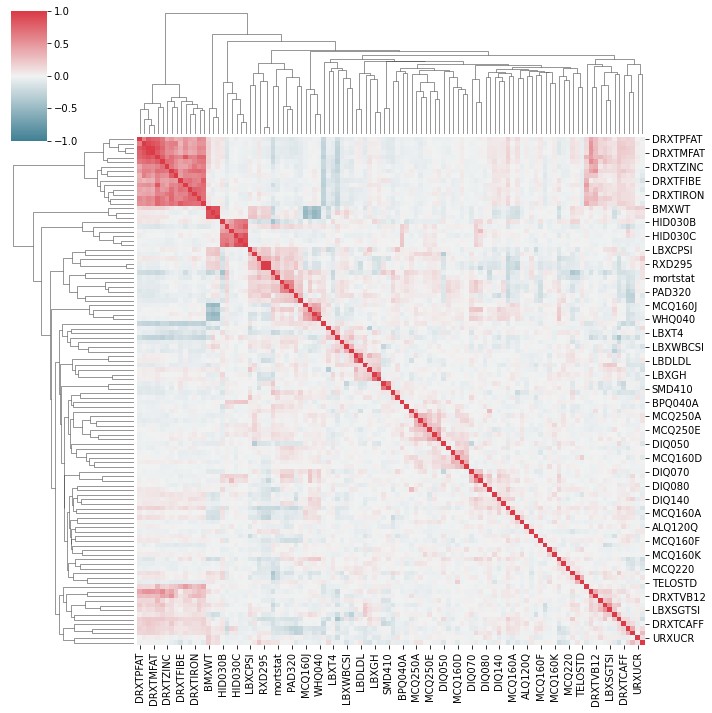

In [177]:
# Correlation between variables

correlation=dataset.corr()

cmap = sns.diverging_palette(220, 10, as_cmap=True)
g=sns.clustermap( correlation , 
             cmap=cmap,
             center=0,
             vmax=1,
             vmin=-1,
                )

In [139]:
m =correlation['mortstat']
m[m>0.25]

RIDAGEMN    0.439064
PAD200      0.254786
PAD320      0.251649
PAQ480      0.310811
mortstat    1.000000
Name: mortstat, dtype: float64

In [117]:
features =list(dataset.columns)
features.remove('mortstat')
target= ['mortstat']

X = dataset[features]
y = dataset[target]

# Spliting data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

In [5]:
print(f'Training set size: {X_train.shape[0]}')
print(f'Validation set size: {X_val.shape[0]}')

Training set size: 632
Validation set size: 159


In [165]:
# CHANGING THE NUMBER OF ESTIMATORS AFFECTS THE FEATURES

random_forest = RandomForestClassifier(n_estimators=20)
random_forest.fit(X_train, y_train)

val_predictions = random_forest.predict(X_val)
print(mean_absolute_error(y_val, val_predictions))

0.25157232704402516


In [166]:
feature_importances = pd.DataFrame(random_forest.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance',ascending=False)

In [185]:
feature_importances[feature_importances['importance'] > 0.023]

,importance
RIDAGEMN,0.057306
URXUMASI,0.045323
TELOMEAN,0.029074
PAQ480,0.026436
LBXIN,0.024780


<AxesSubplot:>

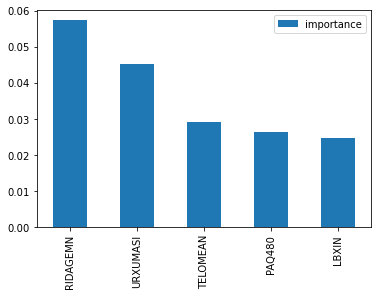

In [168]:
feature_importances[:5].plot.bar()

In [169]:
dataset[['RIDAGEMN','URXUMASI','LBXIN','TELOMEAN','PAQ480']].describe()

,RIDAGEMN,URXUMASI,LBXIN,TELOMEAN,PAQ480
count,791.000000,791.000000,791.000000,791.000000,791.000000
mean,773.538559,317.345420,31.173996,0.943222,2.921618
std,134.344214,1242.240425,23.808692,0.204568,1.637047
min,480.000000,0.200000,3.690000,0.465105,0.000000
25%,679.000000,7.300000,19.369640,0.823712,2.000000
50%,784.000000,23.300000,27.901200,0.917923,3.000000
75%,875.000000,133.900000,36.930400,1.017704,5.000000
max,1016.000000,16920.000000,377.280000,2.078539,6.000000


# RIDAGEMN
## Age in months at date of screening for individuals under 85 years of age.	

In [170]:
years =dataset[['RIDAGEMN','mortstat']]
years['years']= years['RIDAGEMN']/12
years

,RIDAGEMN,mortstat,years
10004,559,0,46.583333
10101,821,1,68.416667
10104,620,0,51.666667
10131,980,1,81.666667
10249,692,1,57.666667
...,...,...,...
9890,616,0,51.333333
9906,678,0,56.500000
9931,748,1,62.333333
9988,648,0,54.000000


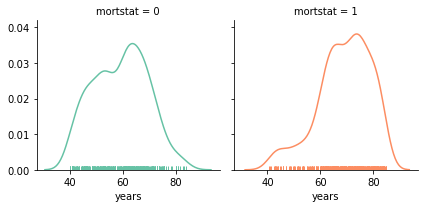

In [171]:
g = sns.FacetGrid(years, hue="mortstat", palette="Set2",col='mortstat')
g = (g.map(sns.distplot, "years", hist=False, rug=True))

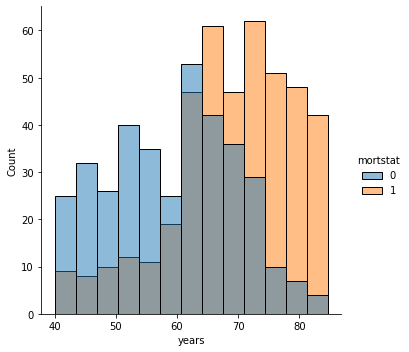

In [172]:
sns.displot(years, x="years", hue="mortstat")

# URXUMASI
## Albumin, urine

<AxesSubplot:xlabel='URXUMASI', ylabel='Density'>

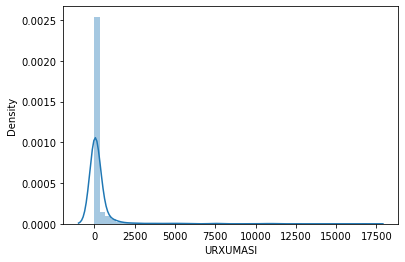

In [173]:
sns.distplot(dataset['URXUMASI'])

In [107]:
# sns.displot(dataset, x="URXUMASI", hue="mortstat")

# LBXIN
## Insulin (uU/mL)

In [174]:
dataset['LBXIN'].describe()

count    791.000000
mean      31.173996
std       23.808692
min        3.690000
25%       19.369640
50%       27.901200
75%       36.930400
max      377.280000
Name: LBXIN, dtype: float64

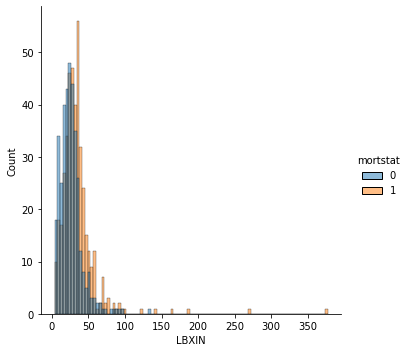

In [175]:
sns.displot(dataset, x="LBXIN", hue="mortstat")

# TELOMEAN
## Mean T/S ratio, telomere mean

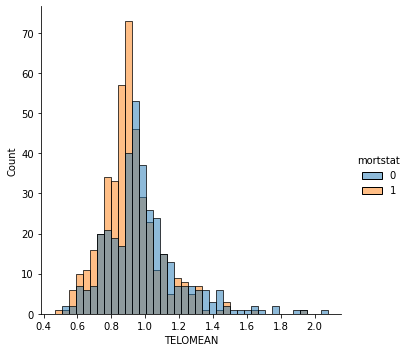

In [183]:
sns.displot(dataset, x="TELOMEAN", hue="mortstat")

# PAQ480
## Daily hours of TV, video or computer use

In [184]:
dataset['tv'] = np.where(dataset['PAQ480'] <4, 0, 1)
dataset['tv'].value_counts()

0    514
1    277
Name: tv, dtype: int64

# Feature Importance by permutation

In [178]:
my_model = RandomForestClassifier(n_estimators=20,random_state=0).fit(X_train_normalized, y_train)

import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(my_model, random_state=1).fit(X_val_normalized, y_val)
eli5.show_weights(perm, feature_names = X_val.columns.tolist())


Weight,Feature
0.0302 ± 0.0291,RIDAGEMN
0.0126 ± 0.0080,LBXGLU
0.0126 ± 0.0113,HID030B
0.0063 ± 0.0080,INDFMPIR
0.0050 ± 0.0050,HUQ010
0.0050 ± 0.0147,DRXTFOLA
0.0050 ± 0.0094,DRXTVB1
0.0050 ± 0.0216,PAQ480
0.0038 ± 0.0062,MCQ092
0.0038 ± 0.0062,LBDLDL
